In [1]:
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118


## Setting MPS 

In [3]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is accessible


False


In [4]:
import torch
print(torch.backends.mps.is_available())  # Should return True if MPS backend is supported


True


In [5]:
device = torch.device("mps")  # Select MPS GPU
tensor = torch.randn(3, 3).to(device)
print(tensor)

tensor([[-1.2682,  0.1366,  0.0730],
        [ 0.6661, -0.9353,  0.2217],
        [-0.0020,  0.6926, -0.5009]], device='mps:0')


# About Data:

## OCTMNIST Diagnosis Categories of Retinal Data:  

## Choroidal Neovascularization (CNV) – Label 0

- Growth of new blood vessels from the choroid through a break in the Bruch membrane.
- Major cause of visual loss.
- Leads to damage in the sub-retinal pigment epithelium (sub-RPE) or subretinal space.

## Diabetic Macular Edema (DME) – Label 1

- Complication of diabetes causing fluid accumulation in the macula.
- Affects the fovea, where vision is sharpest.
- Leads to progressive vision loss over time, making it hard to focus.


## Drusen – Label 2

- Yellow deposits of lipids and proteins under the retina.
- Small drusen are generally harmless.
- Large drusen are an early sign of dry age-related macular degeneration.

## Normal Retina – Label 3

- Healthy retina without signs of CNV, DME, or drusen.

## Installing Data

In [9]:
# pip install medmnist

In [10]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from medmnist import OCTMNIST
import numpy as np
from collections import Counter
from torchvision.transforms import ToTensor
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load train, validation, and test datasets
train_dataset = OCTMNIST(split='train', download=True, transform=transform)
val_dataset = OCTMNIST(split='val', download=True, transform=transform)
test_dataset = OCTMNIST(split='test', download=True, transform=transform)

# Create DataLoaders for batch processing
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [12]:
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 97477
Validation set size: 10832
Test set size: 1000


In [13]:
# Calculate total images
total_images = len(train_dataset) + len(val_dataset) + len(test_dataset)
print(f"Total images in OCTMNIST: {total_images}")

Total images in OCTMNIST: 109309


In [14]:
train_loader

# Visualize data in each folder

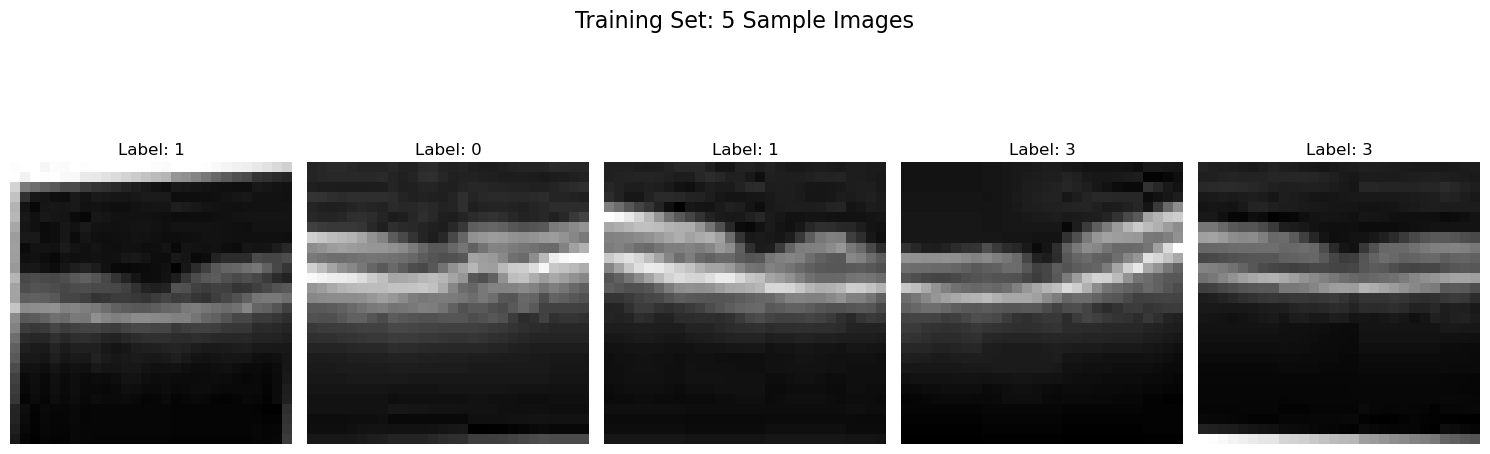

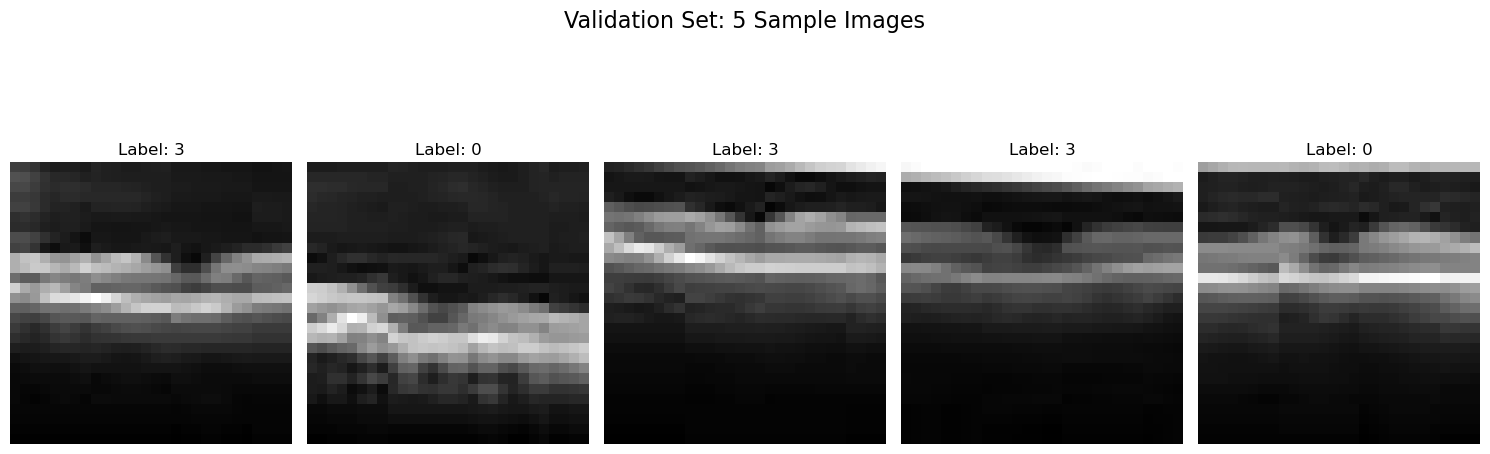

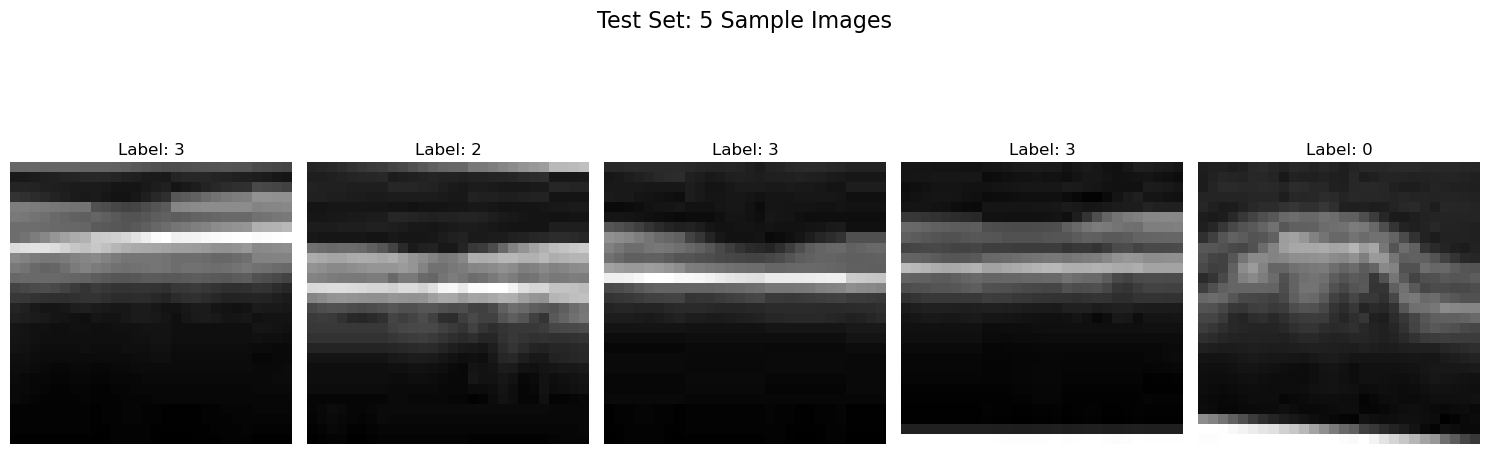

In [16]:
def show_sample_images(loader, title):
    # Load one batch of images and labels
    images, labels = next(iter(loader))

    # Display the first 5 images
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title, fontsize=16, y=1.05)  # Set title for the figure
    for i in range(5):
        axes[i].imshow(images[i][0], cmap='gray')  # OCT images are grayscale
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Show sample images
show_sample_images(train_loader, "Training Set: 5 Sample Images")
show_sample_images(val_loader, "Validation Set: 5 Sample Images")
show_sample_images(test_loader, "Test Set: 5 Sample Images")


The visualization displays randomly selected grayscale retinal OCT images from each dataset (validation and test), showcasing how images differ between classes. Noticeable structural differences can be seen, particularly in the fluid buildup and irregular layers (Labels 0, 1, 2) compared to normal, smoother retinal layers (Label 3), which can help in distinguishing pathological conditions.

## Distribution of labels in each set of data:

,Label,Train Count,Train %,Validation Count,Validation %,Test Count,Test %
0,CNV (0),33484,34.350667,3721,34.351920,250,25.0
1,DME (1),10213,10.477343,1135,10.478213,250,25.0
2,Drusen (2),7754,7.954697,862,7.957903,250,25.0
3,Normal (3),46026,47.217292,5114,47.211965,250,25.0


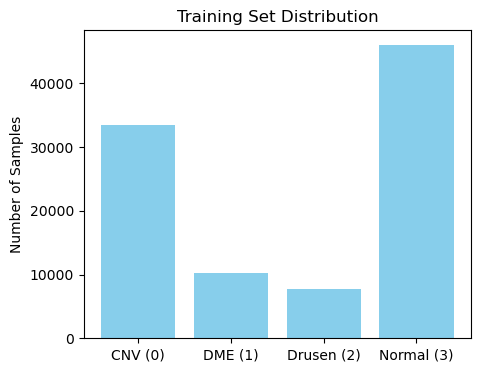

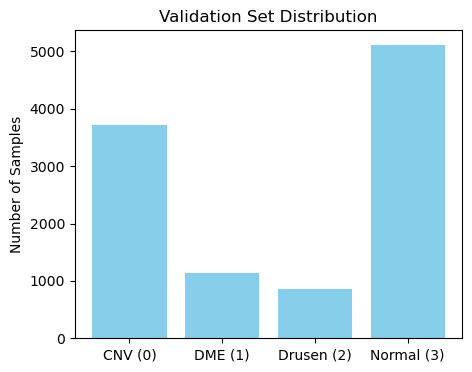

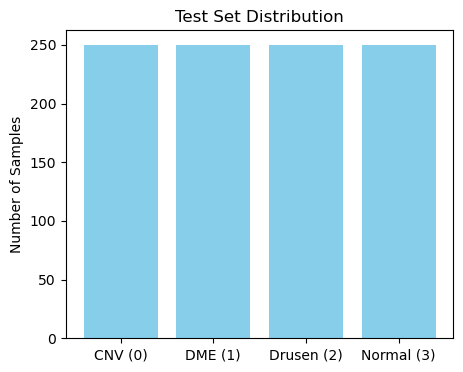

In [19]:
def get_label_distribution(dataset):
    labels = [sample[1].item() for sample in dataset]  # Extract all labels
    label_counts = Counter(labels)  # Count occurrences of each label
    total_labels = sum(label_counts.values())

    # Normalize to get percentage distribution
    label_distribution = {label: (count / total_labels) * 100 for label, count in label_counts.items()}
    return label_counts, label_distribution

# Get distribution for training, validation, and test sets
train_counts, train_distribution = get_label_distribution(train_dataset)
val_counts, val_distribution = get_label_distribution(val_dataset)
test_counts, test_distribution = get_label_distribution(test_dataset)

# Prepare data to display
distribution_data = {
    'Label': ['CNV (0)', 'DME (1)', 'Drusen (2)', 'Normal (3)'],
    'Train Count': [train_counts.get(i, 0) for i in range(4)],
    'Train %': [train_distribution.get(i, 0) for i in range(4)],
    'Validation Count': [val_counts.get(i, 0) for i in range(4)],
    'Validation %': [val_distribution.get(i, 0) for i in range(4)],
    'Test Count': [test_counts.get(i, 0) for i in range(4)],
    'Test %': [test_distribution.get(i, 0) for i in range(4)],
}

df_distribution = pd.DataFrame(distribution_data)
display(df_distribution)

# Plotting the distribution for better visualization
def plot_distribution(counts, title):
    labels = ['CNV (0)', 'DME (1)', 'Drusen (2)', 'Normal (3)']
    values = [counts.get(i, 0) for i in range(4)]
    plt.figure(figsize=(5, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Number of Samples")
    plt.show()

# Plot distributions
plot_distribution(train_counts, "Training Set Distribution")
plot_distribution(val_counts, "Validation Set Distribution")
plot_distribution(test_counts, "Test Set Distribution")


Insights from the OCTMNIST Label Distribution:
Training Set:

The dataset is highly imbalanced, with the Normal Retina (Label 3) having the highest number of samples.
CNV (Label 0) also has a large number of samples but is less than the normal retina class.
DME (Label 1) and Drusen (Label 2) have significantly fewer samples compared to CNV and Normal Retina, indicating an imbalance that may affect model performance.
Validation Set:

Similar imbalance is observed in the validation set:
Normal Retina (Label 3) and CNV (Label 0) dominate.
DME (Label 1) and Drusen (Label 2) have lower representation, mirroring the training set.
This consistency indicates that the model’s performance on validation will likely reflect similar biases as the training.
Test Set:

The test set is perfectly balanced with an equal number of samples for each category.
This balanced test distribution ensures that the final evaluation metric will not be biased toward any one label, providing an unbiased assessment of model performance.

# Appproach: 
- Address the imbalance using techniques such as:
- -- Augmentation: Apply augmentation (e.g., rotation, flipping) to generate more training samples, particularly for DME and Drusen.
  
- -- Evaluation: Carefully monitor per-class accuracy and recall metrics during validation and testing to ensure the model doesn’t ignore minority classes.

# Statistics of data`

In [23]:
# Function to compute dataset statistics
def dataset_statistics(dataset):

    labels = [sample[1].item() for sample in dataset]  # Extract all labels
    images = [(sample[0]).numpy() for sample in dataset]  # Convert images to tensors and numpy arrays

    # Image statistics
    image_shapes = [image.shape for image in images]  # Get shape of each image
    flattened_pixels = [image.flatten() for image in images]  # Flatten images for pixel analysis
    pixel_values = np.concatenate(flattened_pixels)

    # Compute statistics
    stats = {
        "Total Images": len(images),
        "Image Shape": image_shapes[0] if len(image_shapes) > 0 else "N/A",  # Assuming uniform shapes
        "Min Pixel Value": np.min(pixel_values),
        "Max Pixel Value": np.max(pixel_values),
        "Mean Pixel Value": np.mean(pixel_values),
        "Standard Deviation of Pixels": np.std(pixel_values),
        "Number of Unique Labels": len(set(labels)),
        "Label Counts": Counter(labels)
    }

    return stats

# Analyze train, validation, and test sets
train_stats = dataset_statistics(train_dataset)
val_stats = dataset_statistics(val_dataset)
test_stats = dataset_statistics(test_dataset)

# Prepare data for display
overall_stats = {
    "Statistic": ["Total Images", "Image Shape", "Min Pixel Value", "Max Pixel Value",
                  "Mean Pixel Value", "Std Dev of Pixels", "Unique Labels", "Label Counts"],
    "Training Set": [train_stats["Total Images"], train_stats["Image Shape"], train_stats["Min Pixel Value"],
                     train_stats["Max Pixel Value"], train_stats["Mean Pixel Value"],
                     train_stats["Standard Deviation of Pixels"], train_stats["Number of Unique Labels"],
                     dict(train_stats["Label Counts"])],
    "Validation Set": [val_stats["Total Images"], val_stats["Image Shape"], val_stats["Min Pixel Value"],
                       val_stats["Max Pixel Value"], val_stats["Mean Pixel Value"],
                       val_stats["Standard Deviation of Pixels"], val_stats["Number of Unique Labels"],
                       dict(val_stats["Label Counts"])],
    "Test Set": [test_stats["Total Images"], test_stats["Image Shape"], test_stats["Min Pixel Value"],
                 test_stats["Max Pixel Value"], test_stats["Mean Pixel Value"],
                 test_stats["Standard Deviation of Pixels"], test_stats["Number of Unique Labels"],
                 dict(test_stats["Label Counts"])]
}

# Display results
df_overall_stats = pd.DataFrame(overall_stats)
display(df_overall_stats)


,Statistic,Training Set,Validation Set,Test Set
0,Total Images,97477,10832,1000
1,Image Shape,"(1, 28, 28)","(1, 28, 28)","(1, 28, 28)"
2,Min Pixel Value,0.0,0.0,0.0
3,Max Pixel Value,1.0,1.0,1.0
4,Mean Pixel Value,0.188943,0.188436,0.202933
5,Std Dev of Pixels,0.196276,0.195774,0.210886
6,Unique Labels,4,4,4
7,Label Counts,"{0: 33484, 3: 46026, 1: 10213, 2: 7754}","{3: 5114, 0: 3721, 1: 1135, 2: 862}","{3: 250, 2: 250, 0: 250, 1: 250}"


# Image Info:

- Shape: (1, 28, 28) (grayscale, small size)
- Pixel values: 0 to 1 (already normalized)
- Mean pixel value: ~0.18-0.20 (consistent across sets)

# Image Info Deep Dive:

In [26]:
# Function to get image sizes and their counts
def get_image_size_counts(dataset):
    # Extract image shapes (convert PIL to tensor for safety)
    image_sizes = [(sample[0]).shape for sample in dataset]
    return pd.Series(image_sizes).value_counts()

# Get image size counts for the train set
train_image_sizes = get_image_size_counts(train_dataset)
val_image_sizes = get_image_size_counts(val_dataset)
test_image_sizes = get_image_size_counts(test_dataset)

# Display the counts
print(train_image_sizes)
print(val_image_sizes)
print(test_image_sizes)


(1, 28, 28)    97477
Name: count, dtype: int64
(1, 28, 28)    10832
Name: count, dtype: int64
(1, 28, 28)    1000
Name: count, dtype: int64


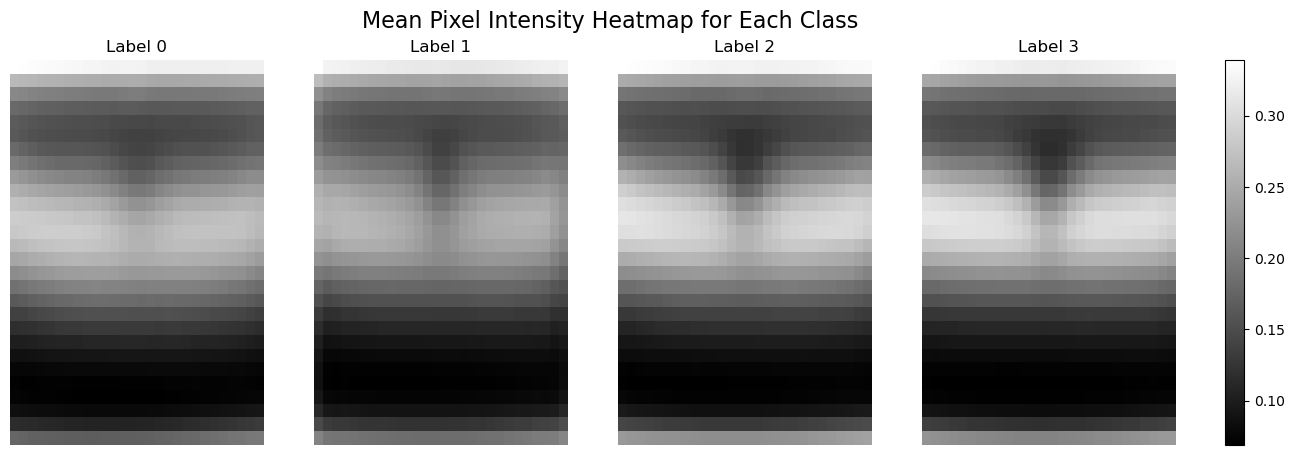

In [27]:
def plot_mean_pixel_heatmap(dataset):
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    fig.suptitle("Mean Pixel Intensity Heatmap for Each Class", fontsize=16)

    for label in range(4):
        # Collect all images for the given label
        images = [(sample[0]).numpy().squeeze() for sample in dataset if sample[1].item() == label]
        # Compute the mean image
        mean_image = np.mean(images, axis=0)

        # Plot the heatmap
        ax = axes[label]
        cax = ax.imshow(mean_image, cmap='gray', aspect='auto')
        ax.set_title(f"Label {label}")
        ax.axis('off')

    # Add colorbar to the side
    fig.colorbar(cax, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()

# Apply to the training dataset
plot_mean_pixel_heatmap(train_dataset)


# General Structure:

Each heatmap represents the average pixel intensity of images from a specific label, showing common patterns.
Brighter regions indicate higher pixel intensity, which could correspond to denser or abnormal structures, while darker regions represent less dense areas or background.
Class-wise Analysis:

Label 0 (CNV - Choroidal Neovascularization):

More variation in the upper-middle region, suggesting abnormal blood vessel growth near this area.
Label 1 (DME - Diabetic Macular Edema):

Central bright region indicates fluid accumulation in the macula, which is a characteristic of DME.
Label 2 (Drusen):

Slightly more uniform but shows bright spots that could correspond to lipid deposits under the retina.
Label 3 (Normal Retina):

The heatmap appears smoother and more uniform, with no distinct bright spots or irregularities, representing a healthy retina.

## Check if the data is Shuffled

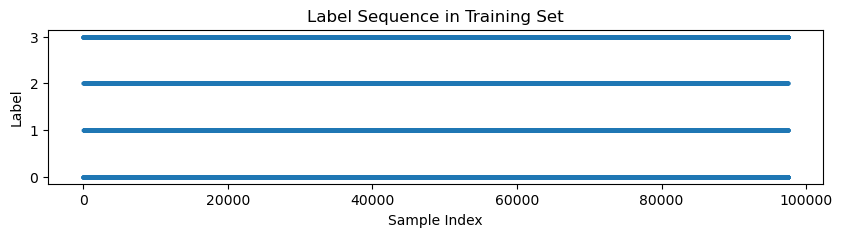

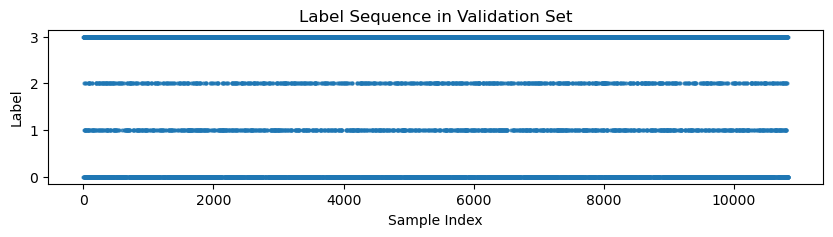

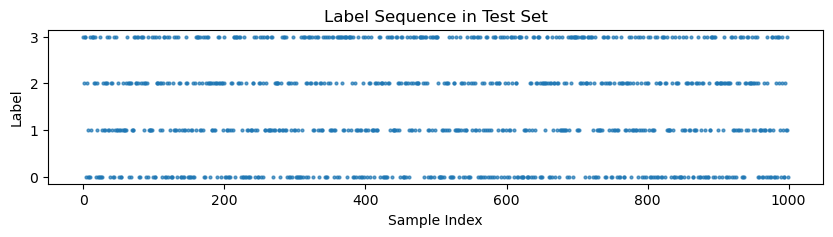

In [30]:
def check_label_sequence(dataset, name):
    labels = [sample[1].item() for sample in dataset]  # Extract all labels
    plt.figure(figsize=(10, 2))
    plt.plot(labels, marker='o', linestyle='', markersize=2, alpha=0.7)  # Scatter plot of label order
    plt.title(f"Label Sequence in {name}")
    plt.xlabel("Sample Index")
    plt.ylabel("Label")
    plt.show()

# Check for train, validation, and test sets
check_label_sequence(train_dataset, "Training Set")
check_label_sequence(val_dataset, "Validation Set")
check_label_sequence(test_dataset, "Test Set")


Training set needs shuffling to avoid bias during training, as the model may overfit to one class at a time.
Validation set has partial shuffling, but further improvement may help ensure better evaluation during training.

In [32]:
def extract_data_and_labels(dataset):
    # Extract images and labels from dataset
    images = [torch.flatten((sample[0])) for sample in dataset]  # Flatten images to 1D arrays
    labels = [sample[1].item() for sample in dataset]  # Extract labels

    # Stack the list of tensors into one tensor
    X = torch.stack(images)
    y = torch.tensor(labels)

    return X, y

# Extract X and y for train, validation, and test sets
X_train, y_train = extract_data_and_labels(train_dataset)
X_val, y_val = extract_data_and_labels(val_dataset)
X_test, y_test = extract_data_and_labels(test_dataset)

# Display the shapes of the resulting tensors
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: torch.Size([97477, 784]), y_train shape: torch.Size([97477])
X_val shape: torch.Size([10832, 784]), y_val shape: torch.Size([10832])
X_test shape: torch.Size([1000, 784]), y_test shape: torch.Size([1000])


In [33]:
def shuffle_data(X, y):
    idx = np.random.permutation(X.shape[0])
    return X[idx], y[idx]

X_train_split, y_train_split = shuffle_data(X_train, y_train)
X_val_split, y_val_split = shuffle_data(X_val, y_val)
X_test, y_test = shuffle_data(X_test, y_test)

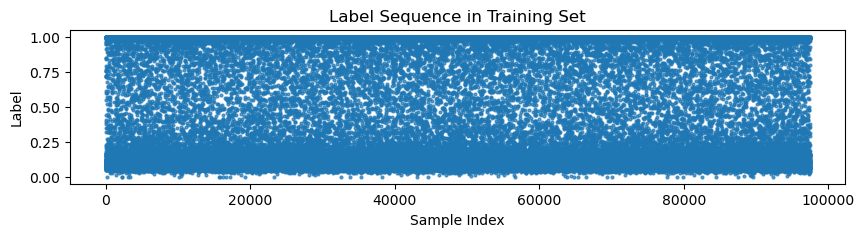

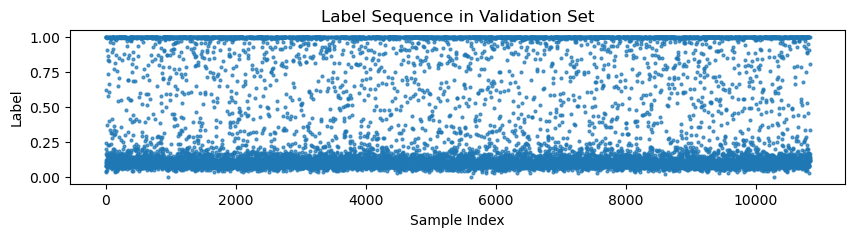

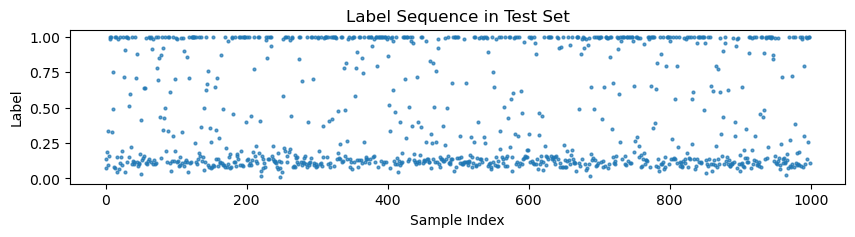

In [34]:

check_label_sequence(X_train_split, "Training Set")
check_label_sequence(X_val_split, "Validation Set")
check_label_sequence(X_test, "Test Set")


The labels are now well shuffled, with no obvious patterns or grouping of labels.
This randomness ensures that the model will encounter samples from different classes during training, which helps avoid overfitting.

## Data Augmentation

#### Target Classes:

- Augment only the minority classes:
- --DME (Label 1)
- -- Drusen (Label 2)

#### Types of Augmentation:
Since the images are medical OCT scans, we should focus on augmentations we will not distort important features:

Horizontal and vertical flips: Maintains medical relevance.
Small random rotations (e.g., ±15 degrees): Will help generalize to varying scan orientations.
Random cropping and scaling: Will be useful for varying the spatial context of the image.
Gaussian noise: Helps improve robustness to slight pixel noise.


In [38]:
# Create the image data generator for augmentation (for training set only)
train_datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images up to 15 degrees
    width_shift_range=0.1,   # Shift width by 10% of image width
    height_shift_range=0.1,  # Shift height by 10% of image height
    horizontal_flip=True,    # Flip images horizontally
    zoom_range=0.2,           # Zoom in by up to 20%
    shear_range=0.2
)

# Convert data to 4D tensors (for flow function compatibility)
X_train_aug = X_train_split.reshape(-1, 28, 28, 1)  # Reshape to (samples, height, width, channels)
y_train_aug = y_train_split

# Flow augmented data from the generator
train_generator = train_datagen.flow(
    X_train_aug,
    y_train_aug,
    batch_size=32,
    shuffle= True
)

# For validation and test, no augmentation (only rescaling if necessary)
val_test_datagen = ImageDataGenerator()

# (No augmentation applied directly for validation and test sets)
X_val_aug = X_val_split.reshape(-1, 28, 28, 1)  # Reshape for ImageDataGenerator compatibility
y_val_aug = y_val_split
X_test_aug = X_test.reshape(-1, 28, 28, 1)
y_test_aug = y_test


val_generator = val_test_datagen.flow(
    X_val_aug,
    y_val_aug,
    batch_size=32,
    shuffle= False
)

test_generator = val_test_datagen.flow(
    X_test_aug,
    y_test_aug,
    batch_size=32,
    shuffle= False
)


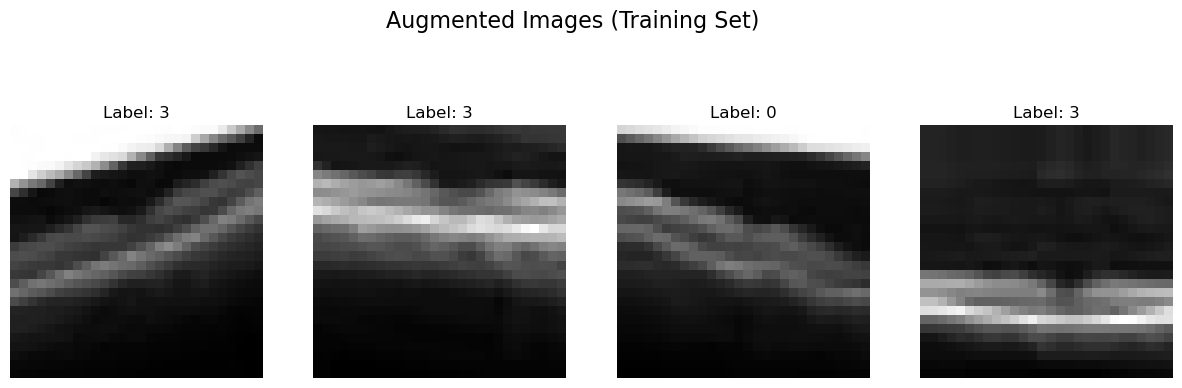

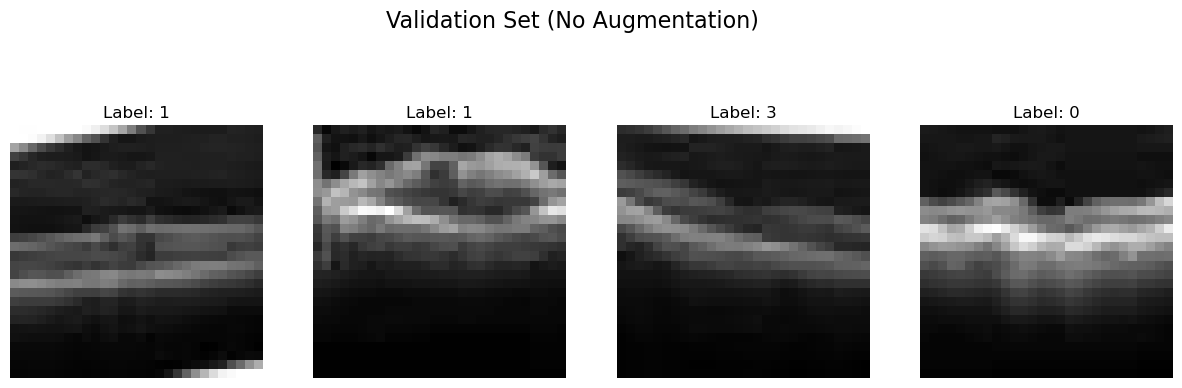

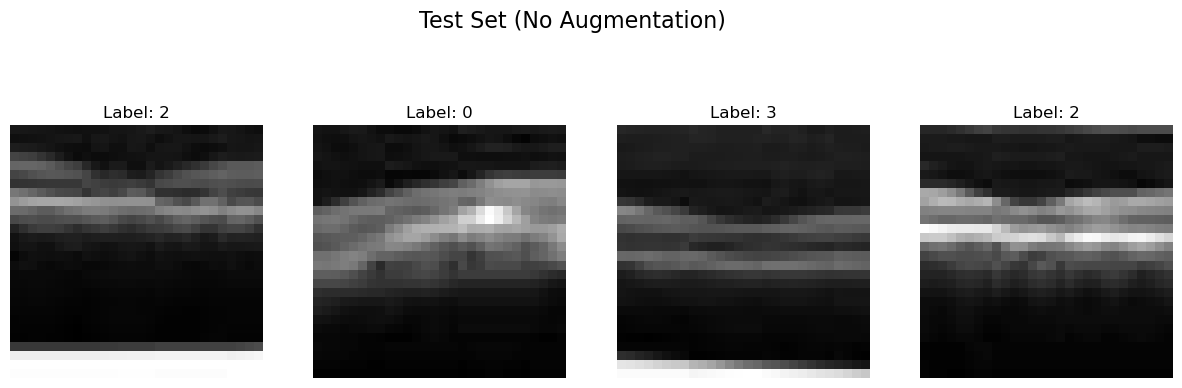

In [39]:
def display_augmented_images(generator, title):
    # Generate a batch of images and labels
    images, labels = next(generator)

    # Plot 4 images from the batch
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    for i in range(4):
        # Since images are normalized between 0 and 1, rescale for display
        image = images[i].reshape(28, 28)  # Reshape to original dimensions
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {int(labels[i])}')
        axes[i].axis('off')
    
    plt.show()

# Display augmented images from the train, validation, and test sets
display_augmented_images(train_generator, "Augmented Images (Training Set)")
display_augmented_images(val_generator, "Validation Set (No Augmentation)")
display_augmented_images(test_generator, "Test Set (No Augmentation)")


# Modelling Part

- plot_roc_curve(y_true, y_pred): Plots the ROC curve for binary classification.
- report_metrics_and_roc(): Displays the classification report, confusion matrix, and ROC curve.
- train_model(): Trains the model using PyTorch, handles early stopping, and saves the best-performing model.
- evaluate(): Evaluates performance during validation.
- evaluate_and_report(): Evaluates the test set and reports key metrics.


In [45]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class ModelTrainer:
    def __init__(self, model, device, class_names, save_path="best_model.pth"):
        self.model = model.to(device)
        self.device = device
        self.class_names = class_names
        self.save_path = save_path
        self.best_val_loss = float('inf')

    def plot_roc_curve(self, y_true, y_pred, title="ROC Curve"):
        fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label=1)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()

    def report_metrics_and_roc(self, y_true, y_pred, pred_classes, dataset_name="Dataset"):
        print(f"\n📊 **Metrics Report for {dataset_name}**")
        
        # Classification Report
        print(classification_report(y_true, pred_classes, target_names=self.class_names))
        
        # Confusion Matrix
        conf_matrix = confusion_matrix(y_true, pred_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title(f"Confusion Matrix - {dataset_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        
        # ROC Curve
        self.plot_roc_curve(y_true, y_pred, f"ROC Curve - {dataset_name}")
        
    def evaluate(self, loader, criterion):
        self.model.eval()
        val_loss, correct, total = 0, 0, 0
    
        with torch.no_grad():
            for X_batch, y_batch in loader:
                # Convert numpy arrays to tensors and move to device
                X_batch = torch.tensor(X_batch, dtype=torch.float32).permute(0, 3, 1, 2).to(self.device)
                X_batch = X_batch.repeat(1, 3, 1, 1)  # Repeat channels to 3
                y_batch = torch.tensor(y_batch, dtype=torch.long).to(self.device)
    
                outputs = self.model(X_batch)
                loss = criterion(outputs, y_batch)
    
                val_loss += loss.item() * X_batch.size(0)
                total += y_batch.size(0)
                correct += (outputs.argmax(1) == y_batch).sum().item()
    
        accuracy = correct / total
        val_loss /= total
        return val_loss, accuracy, total

    def evaluate_and_report(self, loader, dataset_name):
        y_true, y_pred_probs, pred_classes = [], [], []
        
        self.model.eval()
        with torch.no_grad():
            for X_batch, y_batch in loader:
                # Convert numpy arrays to tensors and move to device
                X_batch = torch.tensor(X_batch, dtype=torch.float32).permute(0, 3, 1, 2).to(self.device)
                X_batch = X_batch.repeat(1, 3, 1, 1)  # Repeat channels to 3
                y_batch = torch.tensor(y_batch, dtype=torch.long)
    
                outputs = self.model(X_batch)
                probabilities = F.softmax(outputs, dim=1)
    
                y_true.extend(y_batch.numpy())
                y_pred_probs.extend(probabilities.cpu().numpy()[:, 1])  # Class 1 probs for ROC
                pred_classes.extend(outputs.argmax(1).cpu().numpy())  # Predicted classes
    
        # Report metrics and plot ROC curve
        self.report_metrics_and_roc(np.array(y_true), np.array(y_pred_probs), np.array(pred_classes), dataset_name)


    def train_model(self, train_loader, val_loader, test_loader, optimizer, criterion, epochs=100, patience=5):
        print("\n🔍 **Training the Model**")
        early_stopping_counter = 0

        for epoch in range(1, epochs + 1):
            # Training
            self.model.train()
            train_loss, correct, total = 0, 0, 0
        for X_batch, y_batch in train_loader:
            # Convert numpy arrays to tensors and repeat the channels if necessary
            X_batch = torch.tensor(X_batch, dtype=torch.float32).permute(0, 3, 1, 2).to(self.device)  # Rearrange dimensions
            X_batch = X_batch.repeat(1, 3, 1, 1)  # Convert (batch_size, 1, 28, 28) to (batch_size, 3, 28, 28)
            y_batch = torch.tensor(y_batch, dtype=torch.long).to(self.device)
        
            optimizer.zero_grad()
            outputs = self.model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        
            train_loss += loss.item() * X_batch.size(0)
            total += y_batch.size(0)
            correct += (outputs.argmax(1) == y_batch).sum().item()
            train_accuracy = correct / total
            train_loss /= total

            # Validation
            val_loss, val_correct, val_total = self.evaluate(val_loader, criterion)

            # Print epoch metrics
            print(f"Epoch [{epoch}/{epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}")

            # Check for early stopping
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                torch.save(self.model.state_dict(), self.save_path)  # Save best model
                print("✅ Best model saved!")
                early_stopping_counter = 0
            else:
                early_stopping_counter += 1
                if early_stopping_counter >= patience:
                    print("⏹️ Early stopping triggered.")
                    break

        print("\n🚀 **Training Complete. Loading Best Model for Evaluation...**")
        self.model.load_state_dict(torch.load(self.save_path))

        # Evaluate on test set
        self.evaluate_and_report(test_loader, dataset_name="Test Set")



        

In [47]:
import torch
import torch.nn as nn
import torchvision.models as models

class TransferLearningModel(nn.Module):
    def __init__(self, base_model_fn=models.resnet50, num_classes=4, freeze_base=True):
        super(TransferLearningModel, self).__init__()
        
        # Load the pre-trained base model
        self.base_model = base_model_fn(pretrained=True)
        
        # Freeze base model layers if required
        if freeze_base:
            for param in self.base_model.parameters():
                param.requires_grad = False
        
        # Replace the fully connected layer to match our task (4 classes)
        # ResNet50's original fc layer expects input size of 2048
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.base_model(x)

# Instantiate the model using ResNet50
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
model = TransferLearningModel(num_classes=4).to(device)


print(model)


/Users/nidhi7/Documents/Anaconda/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nidhi7/Documents/Anaconda/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TransferLearningModel(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Seque

In [ ]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

# Define optimizer and loss function
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()

# Instantiate and train using ModelTrainer (assuming it’s defined)
model_trainer = ModelTrainer(model, device, class_names=["CNV", "DME", "Drusen", "Normal"])
model_trainer.train_model(train_generator, val_generator, test_generator, optimizer, criterion, epochs=10, patience=3)



🔍 **Training the Model**
